In [1]:
# Demonstarate K-mean clustering in Scikit learn to demonstrate segments from data.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
os.chdir('C:/Users/Darren savio dsouza/Desktop/jigsaw/machine_learning- Clustering')

In [3]:
data=pd.read_csv("kc_housingdata.csv")

In [4]:
data.head()
#this is a realestate data of kings county, london

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.dtypes
#here if you see there is date variable which is categorical. other are numeric.
#Now we have to change the variable to numeric for clustering first

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
#select some numeric variable from the data to demonstrate the buildings of Kmeans clustering model.
#cluster profiling is required to look at the segments inside a data.
data_num=data[['price','bedrooms','bathrooms','sqft_living']]

In [8]:
data_num.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [9]:
#lets check the data type to check we are working n numeric data.
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [10]:
#scale the data ,using pandas (z transform formula)
def scale(x):
    return(x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0)

#we have done the z scaling on the data.

In [11]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [12]:
##Scale the data using sklearn
#in scikit learn we have a preprocessing module which has a scale option in it.
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [13]:
print(dat_scaled)

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]


In [14]:
print('Types of output is' + str(type(dat_scaled)))

#since we have used scikit  learn the output of it is always going to be a numpy array.
#type of scaled data

Types of output is<class 'numpy.ndarray'>


In [15]:
print("Shape of the object is" +str(dat_scaled.shape))
#shape of scaled data

Shape of the object is(21613, 4)


In [16]:
#you can either use sickit learn or manually do it by defining a fuction

In [20]:
#Create a cluster model
import sklearn.cluster as cluster

In [21]:
#within the cluster module we have a kmeans class
#here we are using three cluster for this model for example.
#just like any other algorithm in scikit learn , after extentiating the object we have the fit method.
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled)

In [22]:
#let us look at the cluster label
kmeans.labels_

#labels in an array essentially talking about which row in the data belongs to which cluster

array([2, 1, 2, ..., 2, 1, 2])

In [23]:
kmeans.cluster_centers_

#the cluster centers are in a four dimensional space because 4 variables were used to create the cluster.

array([[ 1.88826213,  1.08534638,  1.53828912,  1.91997499],
       [-0.03526871,  0.35465742,  0.36895087,  0.22515342],
       [-0.46468042, -0.72681522, -0.86617881, -0.79253015]])

In [24]:
dat_scaled.shape[0]

21613

In [25]:
data_num.shape[0]

21613

In [26]:
# now create a elbow plot when the number of clusters to consider  isnt given
# we will make use of a python library called as scipy and it has a module called spatial distance and 
#within the spatial distance module we have module called cdist
#Elbow method
# we will make use of a python library called scipy.
#cdist-helps in finidng the different kind of distance measure including the euclidean distance.
#for each module we extract the code for WSS
from scipy.spatial.distance import cdist
K=range(1,20)
wss=[]
for k in K:
    kmeans= cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled,kmeans.cluster_centers_,'euclidean'),axis=1))/dat_scaled.shape[0])
    
#the last line create a dissimilarity matrix or it creats a distance matrix between all the rows of my data.
#cdist-basically here with the help of distance measure we find out how far away are each row of the data from all the clusters
#np.min - we find out the minimum distance 
#sum- sum the minimum distance
#wss.append -all things are appended to WSS to obtain within sum of squares.


<function matplotlib.pyplot.show(*args, **kw)>

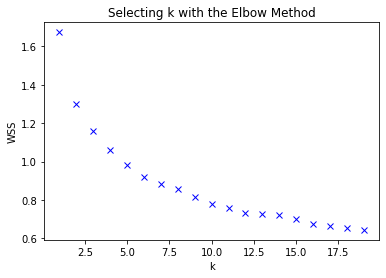

In [29]:
#now we will use matplot (plt.plot) lib to plot within sum of squares corresponding to each value of K
plt.plot(K, wss,"bx")
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show

In [30]:
#Silhouette measure- another measure of godness of cluster fit.

In [31]:
#we will import the metrics module
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8, random_state=200).fit(dat_scaled).labels_

In [32]:
#after that we shall use the matrics module to compute the silhouette score
metrics.silhouette_score(dat_scaled,labels,metric='euclidean',sample_size=10000,random_state=200)
#distance measure i want to use to compute the different values of the silhouette score on all of my data or subset of my data.
#in scikit learn the silhouette score method has a parameter to specify the number of observations to be randomly chosen for 
#computing the silhoette score
#silhouette score of 0.28 for the cluster model with 8 cluster

0.28313345009707275

In [33]:
#remember,
#silhouette score near 1=optimal cluster assignment
#silhouette score near 0 =not optimal cluster assignment

In [34]:
#lets see whats the silhouette score for cluster models with 7 to 13 clusters-checking the elblow plot proximation
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print('Silhouette score for k='+str(i)+'is' +str(metrics.silhouette_score(dat_scaled,labels,metric='euclidean',sample_size=1000,random_state=200)))

Silhouette score for k=7is0.2763712840436325
Silhouette score for k=8is0.2903953376334379
Silhouette score for k=9is0.28508536235309107
Silhouette score for k=10is0.2806069718200512
Silhouette score for k=11is0.27578365881372385
Silhouette score for k=12is0.28154010556603204


In [35]:
#lets try to find the cluster profiles.
#say we select the 8 cluster model as thats the highest, we will want to see what each values of those cluster signify
#for that i will have to create a cluster profile
import os
os.chdir('C:/Users/Darren savio dsouza/Desktop/jigsaw/machine_learning- Clustering')

In [36]:
import cluster_profiles as cluster_profiles

In [37]:
#lets look for the profiles for 8,9,10clusters
kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled)

In [38]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)

#here we use the get xprofile to get the profiles
#we need to giv ethe copy of the data here which is not scaled**
#also we need to specify gthe kmeans model that we have built

#these give the z values of each of the variable in each of the cluster
#here the value 0.64 is equal to the price of 0.64 standard deviation above the average meanin cluster 1

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.644691,0.344504,0.735787,0.992995,3132
1,-0.541668,-0.280571,-1.053502,-0.788342,4013
2,2.285528,0.922012,1.727444,2.194598,994
3,6.410548,1.250798,2.649467,3.697950,161
4,-0.494520,-1.571551,-1.211377,-1.073651,2445
5,0.278340,2.132508,1.031714,1.020664,1070
6,-0.203515,-0.493676,0.194295,-0.238244,5696
7,-0.263011,0.804906,0.129389,0.040654,4102


In [39]:
cluster_profiles.get_profiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,1.438231,1.095053,1.267963,1.438486,3132
1,0.631799,0.922586,0.616330,0.651884,4013
2,2.553597,1.254396,1.629109,1.969089,994
3,5.357597,1.345113,1.964897,2.632939,161
4,0.663848,0.566387,0.558835,0.525898,2445
5,1.189203,1.588388,1.375735,1.450704,1070
6,0.861660,0.863788,1.070759,0.894796,5696
7,0.821217,1.222085,1.047121,1.017952,4102


In [40]:
#using  kmeans to classify images
#C:\Users\Darren savio dsouza\Desktop\jigsaw\machine_learning- Clustering\Images

In [41]:
#Demonstrate to cluster images of different products using kmeans clustering algorithm
#conda install opencv 
# conda install -c conda-forge opencv

In [42]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir("C:/Users/Darren savio dsouza/Desktop/jigsaw/machine_learning- Clustering/Images")
%matplotlib inline

In [43]:
#here we will run the clustering algorithm.
#it will be used to determine if K-means can identify amongst the images of different packets of cigarette 
#belonging to different brands.

In [44]:
#note now its different from the once which we used to do before for data.

In [45]:
#Data available here are in form of images and has to go through data munging to get desired formate or shape that can be used 
#in K- means algorithm
#so we need to change the image format into another format or shape where it cna be read by the kmeans algorithm

In [42]:
#Proceess of capturing images inside python's memory -go inside respective subfolders
#and capture all the images 

In [46]:
#function here gets the path of the image
#you will read the images using the .imread function in the cv2
#you will convert them into gray scale images that we will do using the cv2.COLOR method using the required option
#you will reasize the image to a number which is managable
#ypu willindex theimage so that you can select the particular portion of that image
#note that the value of images have been found out experimentally by reading a couple of images and and comparing
def get_image(path):
    im=cv2.imread(path)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im=cv2.resize(im,(90,135),cv2.INTER_LINEAR)
    i=im[0:100,:]
    return i

In [47]:
#we will now create an empty list containing the lable of the images. That is the folder number to whioch each if these images belong
#we also make a list of images where we will keep the image matrices of the images using imread method
labels=[]
images=[]

In [48]:
#we will now poppulate the list inside the below for loop
#before running the below for loop make sure the folder containing all the images do not have any other files other than the 
#image files.
#1- fetching the image
#2-reading the image
#3-appending the image

for i in ['1','2','3','4']:
    for p in enumerate(os.listdir(os.getcwd()+"\\"+i)):
        images.append(get_image(os.getcwd()+'\\'+i+'\\'+p[1]))
        labels.append(i)
        
       

In [49]:
#now we will convert the list of all the images into a numpy array
x_train=np.array(images)
x_train.shape

#we will get an array were we have 380 images, 100 pixel long, 30 pixel wide

(380, 100, 90)

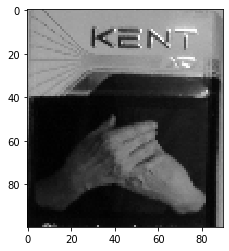

In [50]:
#use plt.imshow to show the image
#it is the 100th image in my nth dimensional array
plt.imshow(x_train[100,:],cmap='gray')

In [51]:
#next we will flatten the images
#flatten the images by making sure that in each row of the n-dimensional array there is just a single image


In [52]:
#we use reshape methods to convert it into 100 by 90, which means a 9000 pixels vector
pixels=x_train.flatten().reshape(380,9000)  #31500=350*300*3
print(pixels.shape)

(380, 9000)


In [53]:
#now we can start with our modeling
#we have converted our images into predictor matrix
#or we have converted into single matrix which can be feed into kmean algorithm
import pandas as pd
from sklearn.cluster import KMeans

In [54]:
from sklearn.preprocessing import MinMaxScaler

#we scale the data here. In kmean clustering we used a z-scaler. There are different ways to scale
#here we are scaling using MinMaxScaler

In [55]:
Scaler=MinMaxScaler()
train=Scaler.fit_transform(pixels)
#we are extentiating an obect of minmaxscaler class
#then we are using fit_transform method to get matrix of data points that are scaled

In [56]:
kmeans=KMeans(init='k-means++',n_clusters=4,n_init=10)
np.random.seed(100)
kmeans.fit(train)

#here we used n_clusters as 4 as we knew we had four different kind of ciggerate packets .

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

In [58]:
#now we will create a data frame where we will store our cluster labels and the image id
image_clusters=pd.DataFrame({'Cluster':kmeans.labels_,"Id":range(0,380)})

In [59]:
image_clusters.head()

,Cluster,Id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [60]:
#now we will subset the data and we will only select the images that belong to predicted cluster 0
clust_1=image_clusters[image_clusters.Cluster==0]

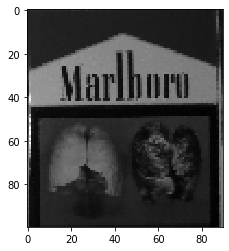

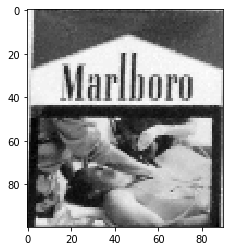

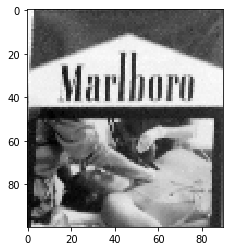

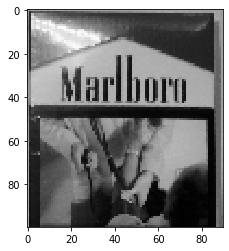

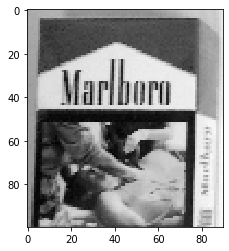

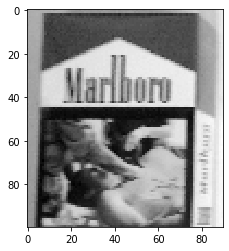

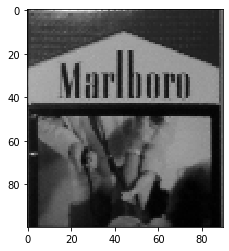

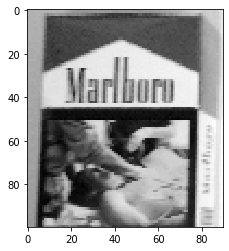

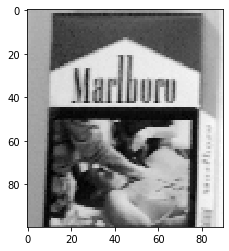

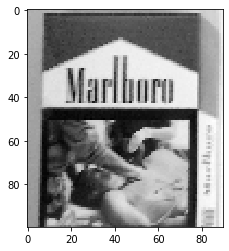

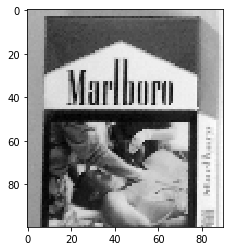

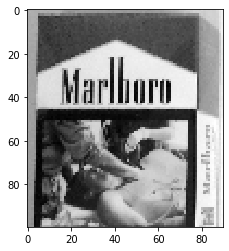

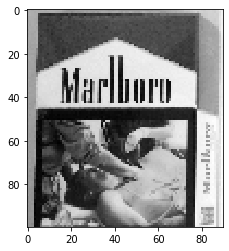

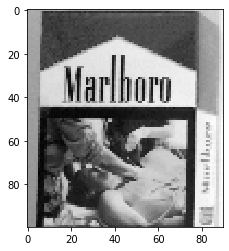

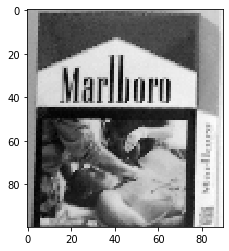

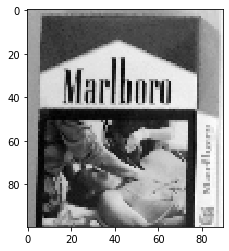

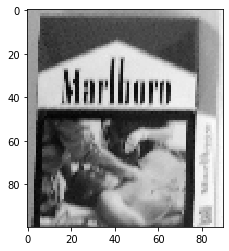

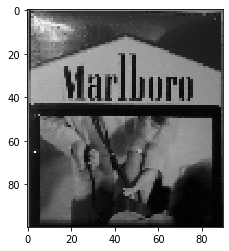

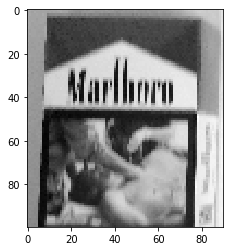

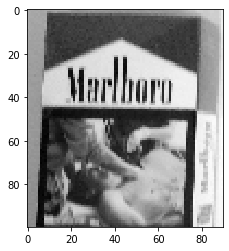

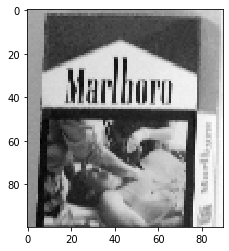

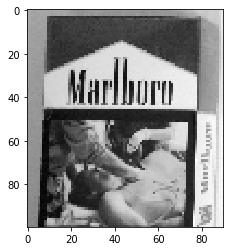

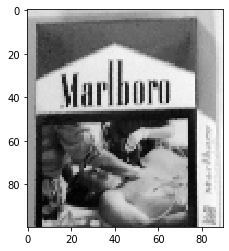

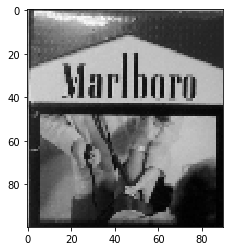

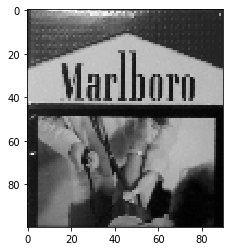

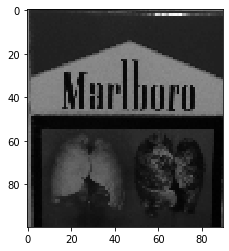

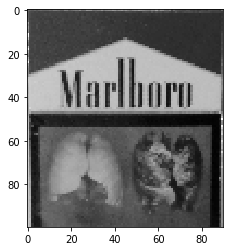

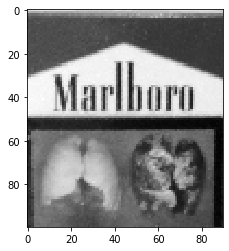

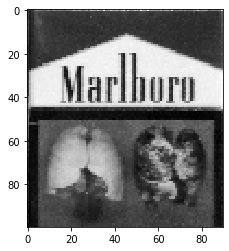

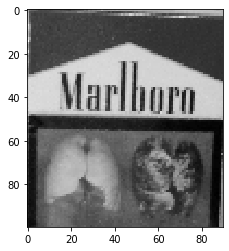

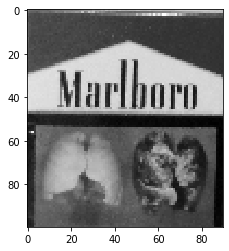

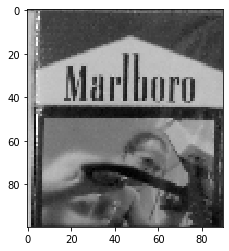

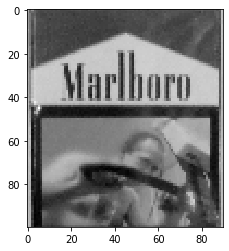

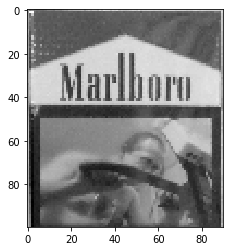

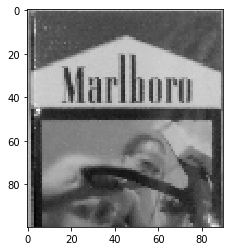

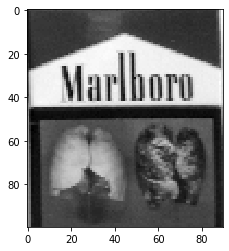

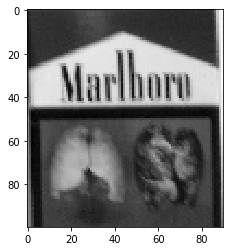

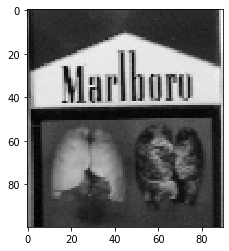

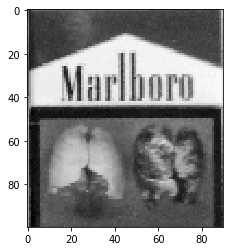

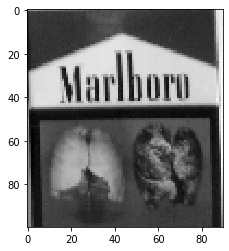

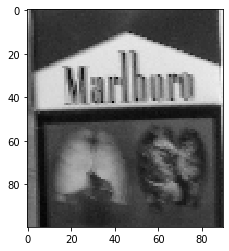

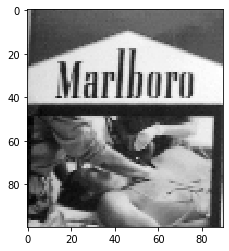

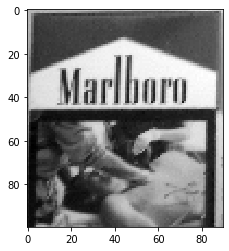

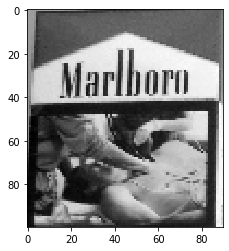

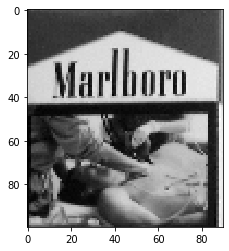

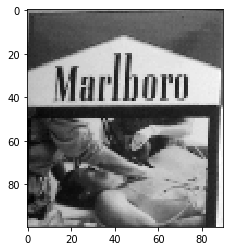

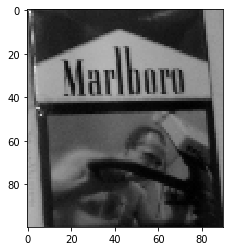

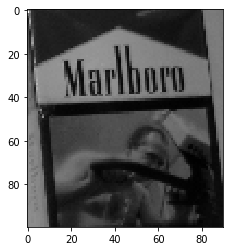

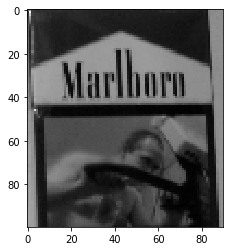

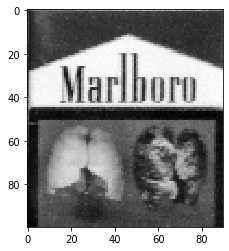

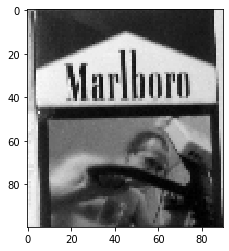

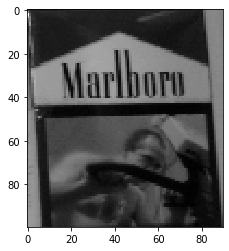

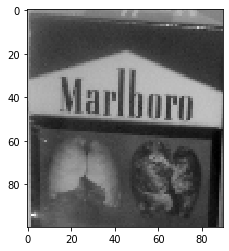

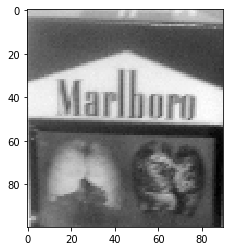

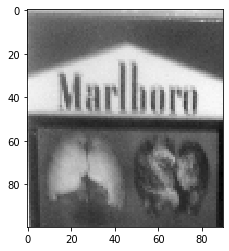

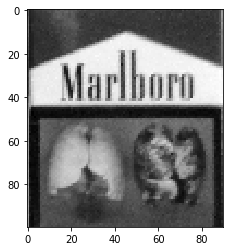

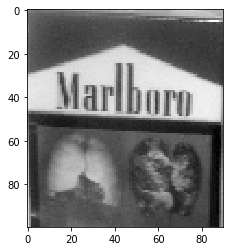

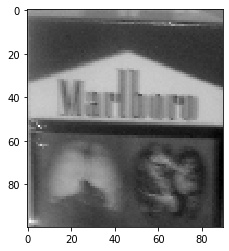

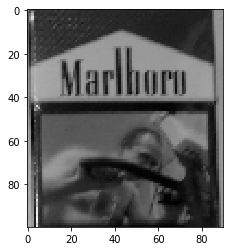

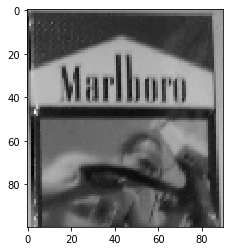

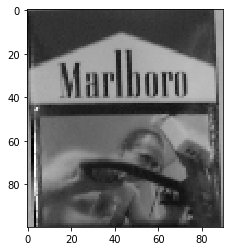

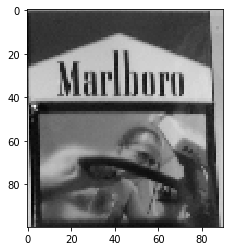

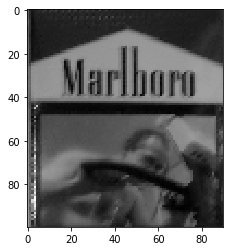

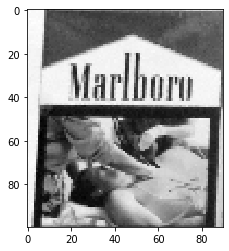

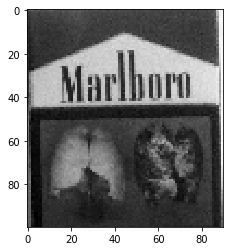

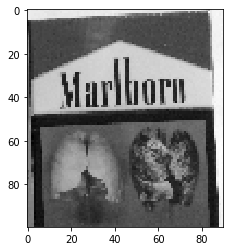

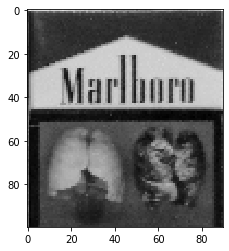

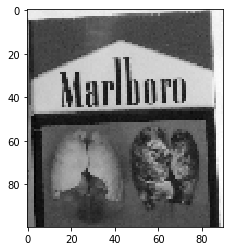

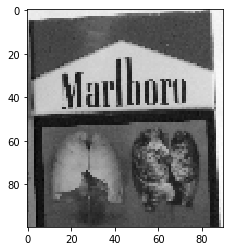

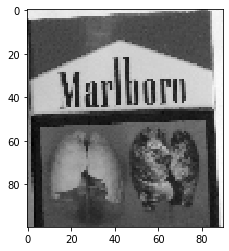

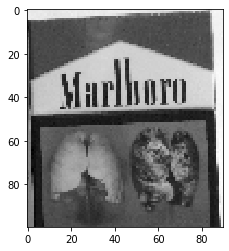

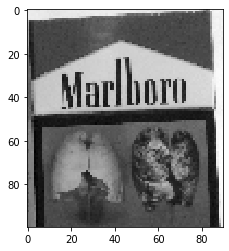

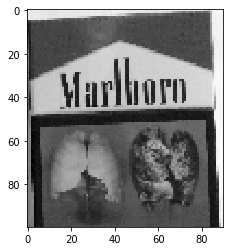

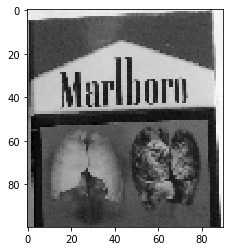

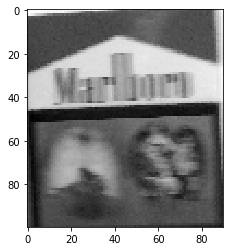

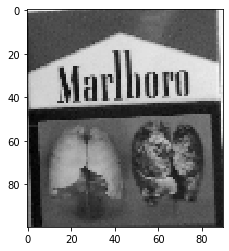

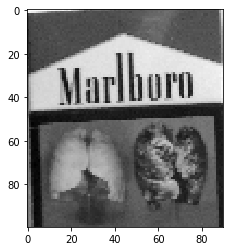

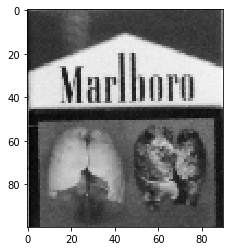

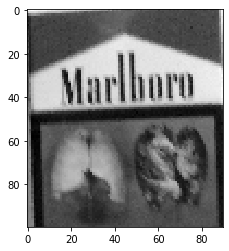

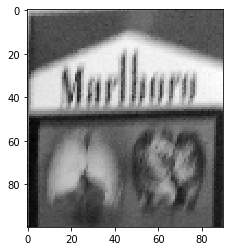

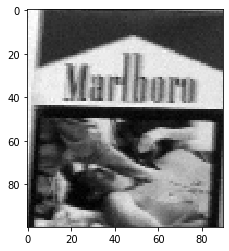

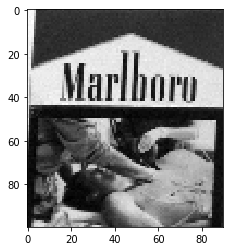

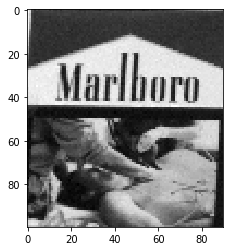

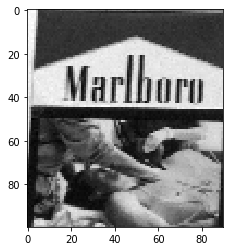

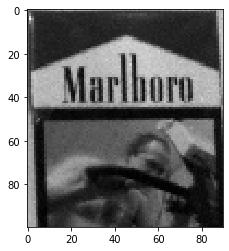

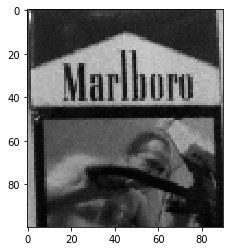

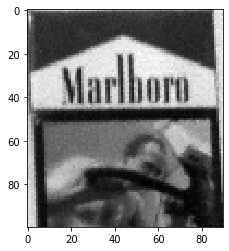

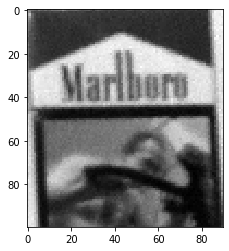

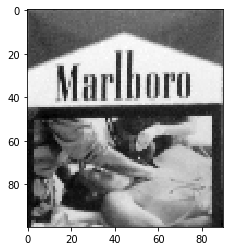

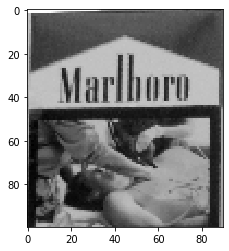

In [61]:
for i in clust_1.Id:
    plt.imshow(x_train[i,:],cmap='gray')
    plt.show()
    
#we are plotting all the images that have a predicted cluster of zero. 
#we see that its of only one brand marlboro
#we get to see that with unsupervised learning as well the image can be classified

In [64]:
#Agglomerative clustering
#here we will see how to build a heirarchial clustering model

In [65]:
#it takes the bottoms ups approach

In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [67]:
os.chdir("C:/Users/Darren savio dsouza/Desktop/jigsaw/machine_learning- Clustering")

In [68]:
data=pd.read_csv("pollution_india_2010.csv",na_values='Null')

In [69]:
data.head()

#so here -if the N02,PM10 and S02 in the air are considered as the measure of air pollution, then which state in India 
#can be considered as forming a cluster based on the pollution levels in the air ?

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [70]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [71]:
data.shape

(181, 5)

In [72]:
data=data.dropna()

In [73]:
data.shape

(175, 5)

In [74]:
data.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [75]:
data.dtypes

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [76]:
#to cluster the data we shall prepare the data a bit.
#we group the data by state and find the aggregate numbers of NO2,PM10 and S02
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)

In [77]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,86.0,502.0,37.0


In [78]:
#Similar to K-means clustering, hierarchical clustering or agglomerative clustering also requires its data to be scaled.
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
data_scaled=data_num.apply(scale,axis=1)

In [79]:
data_scaled.head()

,NO2,PM10,SO2
0,-0.532950,1.400923,-0.867973
1,-0.548580,1.403137,-0.854557
2,-0.477083,1.391492,-0.914409
3,-0.522653,1.399362,-0.876709
4,-0.586407,1.407697,-0.821290


In [80]:
#for hierarchical clustering , using the scipy module rather than the scikit learn module,because scipy module allows
#to create a dendrogram easier than latter. we can create in sckit lear but the code is a bit complicated
from scipy.cluster.hierarchy import dendrogram, linkage

In [81]:
# in order to work with scipy we need to convert the data into np.array
data_scaled=np.array(data_scaled)

In [82]:
#Linkage builds the hierarchical clustering models.
Z=linkage(data_scaled,method='ward')

#ward -one of the ways of calculating distance between a cluster and a point, or a point and a cluster,or a cluster & a cluster

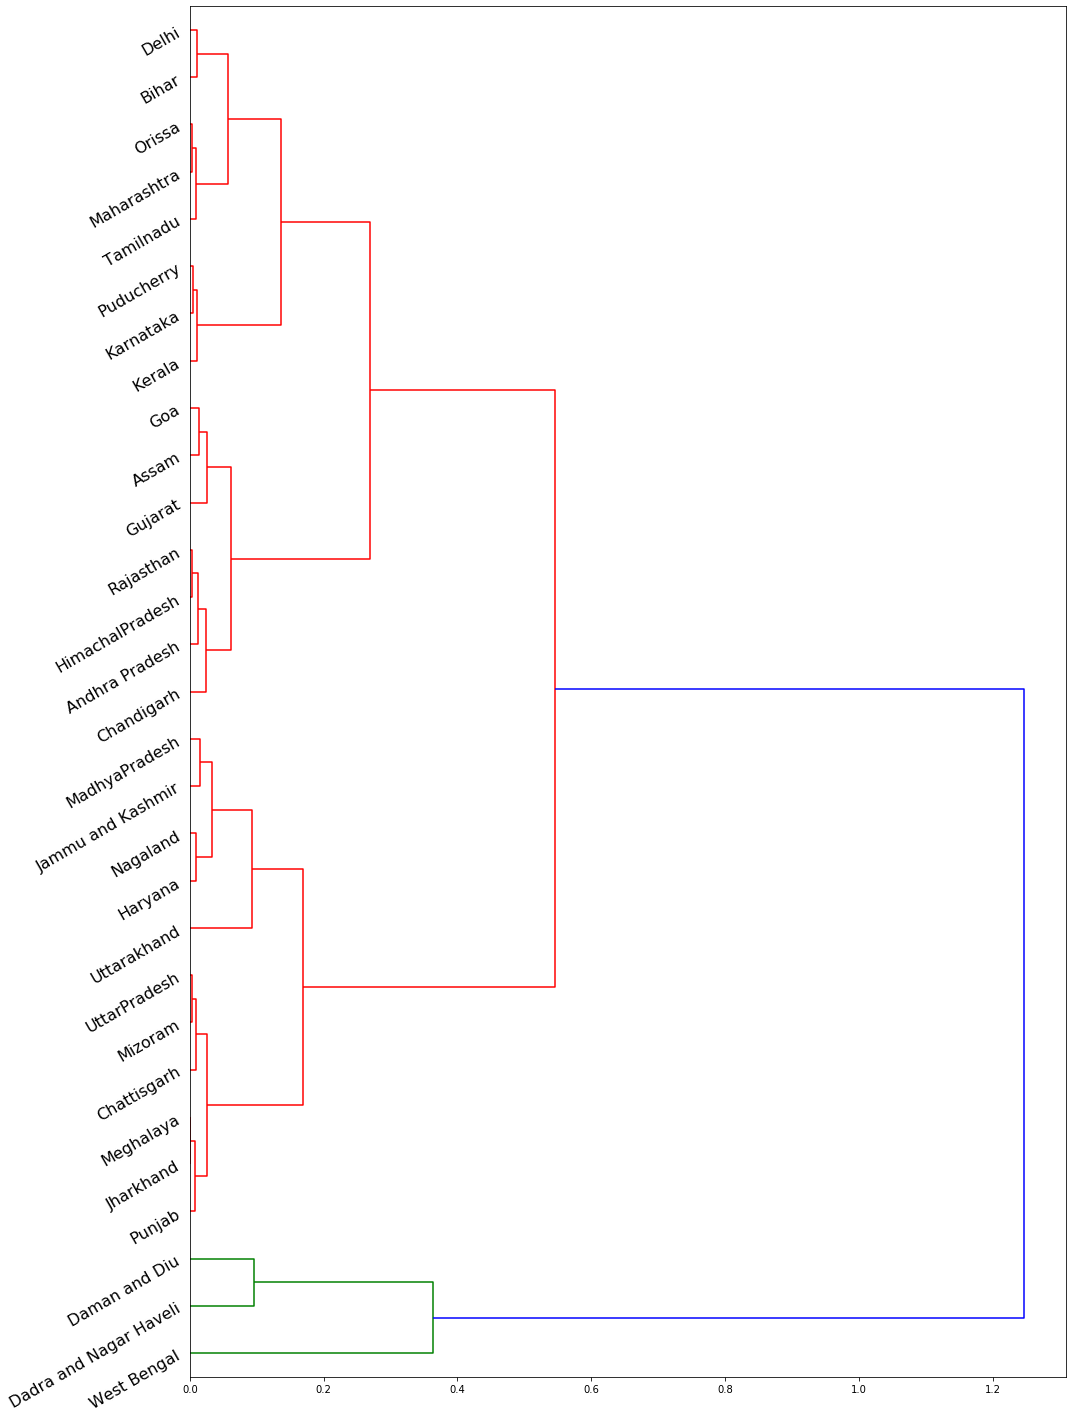

In [83]:
#now we will plot the heirarchical clustering model in the form of a dendrogram using matplotlib

fig, ax=plt.subplots(figsize=(15,20))
ax=dendrogram(Z,orientation='right',labels=np.array(data_pol['State']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()

In [44]:
#here we come to know the clusters about which city is similar to the other.
#also we get to know the threshold at which the dendrogra, is formed.